In [ ]:
cd=city_data
rd=ride_data

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load )
ride_data=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df=pd.merge(ride_data,city_data, on='city' ,how='left')
# Display the data table for preview


In [3]:
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

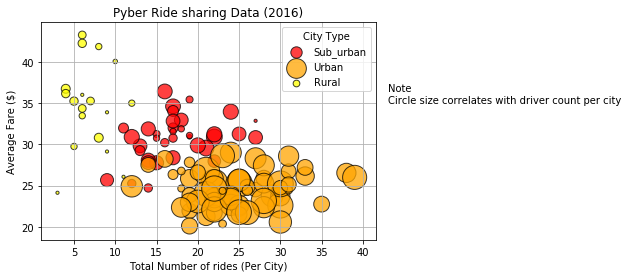

In [4]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

f=df[["city","fare","ride_id","type","driver_count"]]
f1=pd.DataFrame(f.groupby(['city','type']).agg({'fare':'mean','ride_id':'count'}))
f1.reset_index(inplace=True)
l=list(f1.groupby('type'))
l1=[]
for i in l:
   l1.append(i[1])
Sub_urban=l1[1]
Urban=l1[2]
Rural=l1[0]
f.set_index('type',inplace=True)

sub_dri=pd.DataFrame(f.loc["Suburban"]['driver_count'])
urb_dri=pd.DataFrame(f.loc["Urban"]['driver_count'])
rur_dri=pd.DataFrame(f.loc["Rural"]['driver_count'])
sub_dri.reset_index(inplace=True)
Sub_urban['dri']=sub_dri['driver_count']
urb_dri.reset_index(inplace=True)
Urban['dri']=urb_dri['driver_count']
rur_dri.reset_index(inplace=True)
Rural['dri']=rur_dri['driver_count']

plt.scatter(Sub_urban['ride_id'],Sub_urban['fare'],s=Sub_urban['dri']*10,marker='o', facecolors="red", edgecolors="black",alpha=0.75,label='Sub_urban') 
plt.scatter(Urban['ride_id'],Urban['fare'],s=Urban['dri']*10,marker='o', facecolors="orange", edgecolors="black", alpha=0.75,label='Urban')      
plt.scatter(Rural['ride_id'],Rural['fare'],s=Rural['dri']*10,marker='o', facecolors="yellow", edgecolors="black",alpha=0.75,label='Rural')
plt.legend(title='City Type')
plt.xlabel("Total Number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride sharing Data (2016)")
plt.text(43,35,'Note\nCircle size correlates with driver count per city')
plt.grid()
plt.savefig("../Images/Pyber_Ridesharing_Data.png")   
plt.show()
    



## Total Fares by City Type

In [18]:
ft=df[['type','fare']]
ft=ft.groupby('type').sum()
ft['percentage']=(ft['fare']/ft['fare'].sum())*100
ft=ft.rename(columns={"fare":"Total Fares"})
ft.sort_values('Total Fares',inplace=True,ascending=False)
ft

,Total Fares,percentage
type,,
Urban,39854.38,62.724635
Suburban,19356.33,30.463872
Rural,4327.93,6.811493


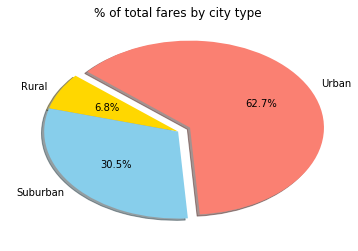

In [12]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

ft=df[['type','fare']]
ft=ft.groupby('type').sum()
ft['percentage']=(ft['fare']/ft['fare'].sum())*100

plt.pie(ft['percentage'],explode=(0,0,0.1),labels=['Rural','Suburban','Urban'],autopct="%1.1f%%", shadow=True,colors=['gold','skyblue','salmon'],startangle=140);
plt.title("% of total fares by city type");

plt.savefig("../Images/fare_percent.png")
plt.show()

## Total Rides by City Type

In [19]:
rt=df[['ride_id','type']]
rt=rt.groupby('type').count()
rt['percentage']=(rt['ride_id']/rt['ride_id'].sum())*100
rt=rt.rename(columns={"ride_id":"Total Rides"})
rt.sort_values('Total Rides',inplace=True,ascending=False)
rt

,Total Rides,percentage
type,,
Urban,1625,68.421053
Suburban,625,26.315789
Rural,125,5.263158


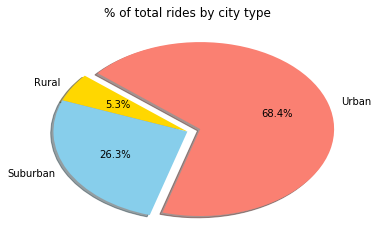

In [6]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

rt=df[['ride_id','type']]
rt=rt.groupby('type').count()
rt['percentage']=(rt['ride_id']/rt['ride_id'].sum())*100

plt.pie(rt['percentage'],explode=(0,0,0.1),labels=['Rural','Suburban','Urban'],autopct="%1.1f%%", shadow=True,colors=['gold','skyblue','salmon'],startangle=140);
plt.title("% of total rides by city type");

plt.savefig("../Images/ride_percent.png")
plt.show()


## Total Drivers by City Type

In [20]:
dt=city_data[['driver_count','type']]
dt=city_data.groupby('type').sum()
dt['percentage']=(dt['driver_count']/dt['driver_count'].sum())*100
dt=dt.rename(columns={"driver_count":"Total Drivers"})
dt.sort_values('Total Drivers',inplace=True,ascending=False)
dt

,Total Drivers,percentage
type,,
Urban,2405,80.894719
Suburban,490,16.481668
Rural,78,2.623613


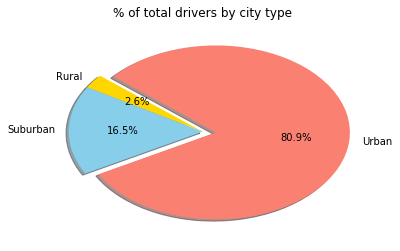

In [21]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

dt=city_data[['driver_count','type']]
dt=city_data.groupby('type').sum()
dt['percentage']=(dt['driver_count']/dt['driver_count'].sum())*100

plt.pie(dt['percentage'],explode=(0,0,0.1),labels=['Rural','Suburban','Urban'],autopct="%1.1f%%", shadow=True,colors=['gold','skyblue','salmon'],startangle=140);
plt.title("% of total drivers by city type");

plt.savefig("../Images/driver_percent.png")
plt.show()
